In [12]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

sns.set_context('notebook', font_scale=1.08)
sns.set_style('ticks')
# plt.style.use('bmh')

from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Verdana']

<Figure size 432x288 with 0 Axes>

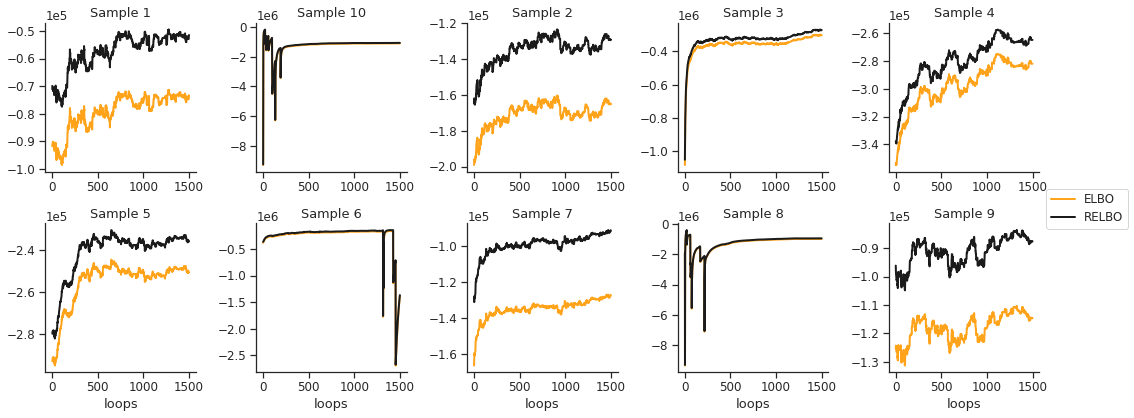

In [23]:
plt.figure()

grs = []

mi = 0
ma = 0
dfs = []
num_idx = 10
for index in range(1, num_idx+1):
    elbos = []
    relbos = []
    loops = []
    with open("../logs/AAAI/log_{}.txt".format(index), "r") as io:
        for num, line in enumerate(io):
            if num <= 2 or num % 2 == 1:
                continue 
            
            try:
                tmps = line.strip().split('\t')
                loops.append(int(tmps[1]))
                elbos.append(float(tmps[2]))
                relbos.append(float(tmps[3]))
            except:
                pass
                
    n_l = len(elbos)
    dfs.append(pd.DataFrame({
        'loops': loops+loops,
        'vals': elbos+relbos, 
        'measure': ['ELBO' if i < n_l else 'RELBO' for i in range(2*n_l)],
        'sample': [str(index) for _ in range(2*n_l)]
    }))
    
#     mi = minimum(df[:, :ELBO]) -5000
#     ma = maximum(df[:, :ELBO]) > 0 ? 0 : (maximum(df[:, :RELBO]) + 5000)
df = pd.concat(dfs) 

g = sns.FacetGrid(df, col='sample', hue='measure', 
                  sharey=False, sharex=False, 
                  col_wrap=5, legend_out=True,
#                   palette=['#bb0000', '#1b1b1b'])
                  palette=['#ffa31a', '#1b1b1b'])
for ax in g.axes.flatten():
    ax.ticklabel_format(style='sci', scilimits=(0,0), 
                        axis='y', useOffset=True, 
                        useLocale=True)
    
g = g.map(sns.lineplot, 'loops', 'vals', 
          dashes=True, markers=True,
          linewidth=2)
g.add_legend(title='', frameon=True, loc='right')

g.set_titles("Sample {col_name}")
g.set(ylabel='')

# plt.tight_layout()
plt.savefig('test.pdf')